In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
from juanfit import gaussian
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
from sumerpy import con_width_funct_4, radiometry

In [2]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_338 = np.linspace(0,1023,1024)*0.04496629878144223 + 671.7967194748996
sumer_338_window = sumer_img[:,:1024]
sumer_338_err = np.sqrt(sumer_338_window*300)
sumer_338_window.shape
sumer_ycen = 1119.81
sumer_ycoord = np.linspace(sumer_ycen-299.2/2,sumer_ycen+299.2/2,300) - 5
np.set_printoptions(precision=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


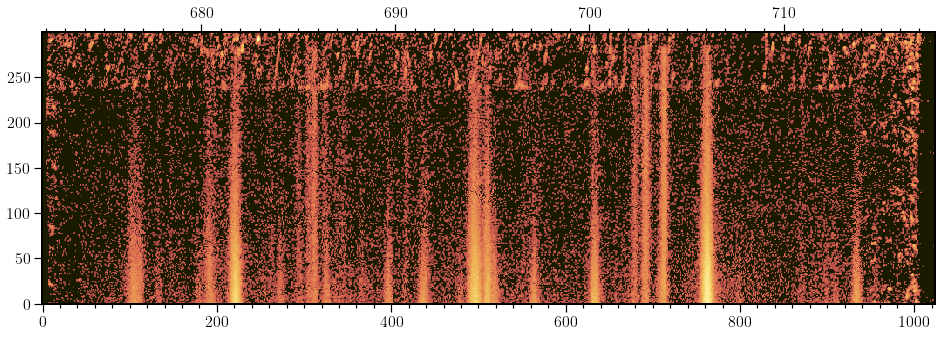

In [3]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_338_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_338[0],wvl_338[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [276.1]


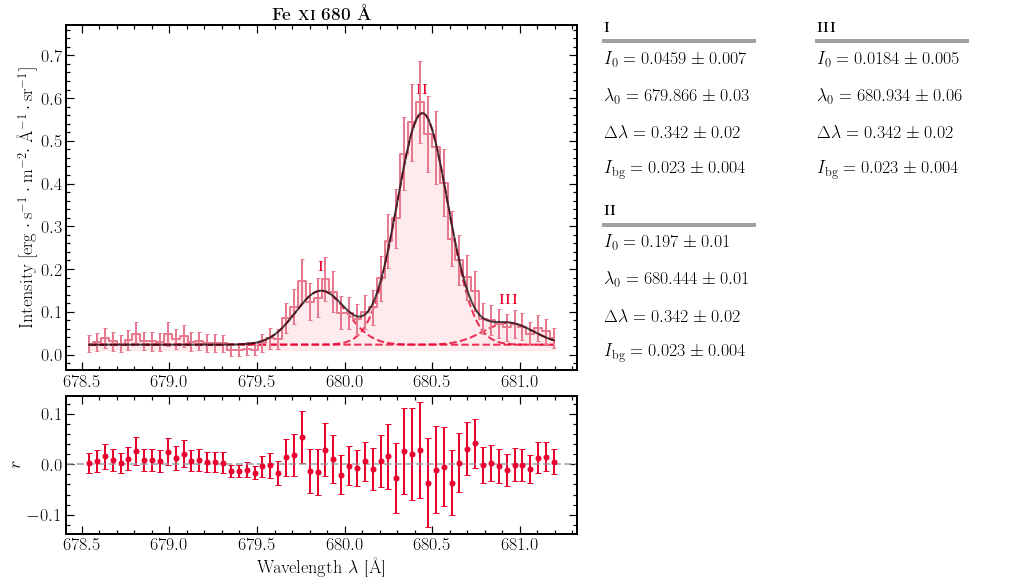

In [4]:
FeXI_680_slice = (150,210)
wvl_FeXI_680 = wvl_338[FeXI_680_slice[0]:FeXI_680_slice[1]]
radiometry_FeXI_680 = radiometry(1,680.5,1,1,bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_FeXI_680 = np.average(sumer_338_window[-30:,FeXI_680_slice[0]:FeXI_680_slice[1]],axis=0)*radiometry_FeXI_680
err_FeXI_680 = np.sqrt(np.sum(300*sumer_338_window[-30:,FeXI_680_slice[0]:FeXI_680_slice[1]],
                        axis=0))/30/300 * radiometry_FeXI_680

FeXI_680_fit_model = SpectrumFitSingle(data=int_FeXI_680,wvl=wvl_FeXI_680,err=err_FeXI_680,
                                      same_width=True,line_number=3,line_wvl_init=[679.7,680.4,680.6],
                                      int_max_init=[0.1,0.6,0.2],fwhm_init=[0.2])

FeXI_680_fit_model.run_lse()
FeXI_680_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 680 \mbox{\AA}}",
                       xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_680_fit_model.line_wvl_fit[1],1,FeXI_680_fit_model.fwhm_fit*1000,DET_B=True))

FWHM after removing instrumental broadening:  [218.05 280.48]


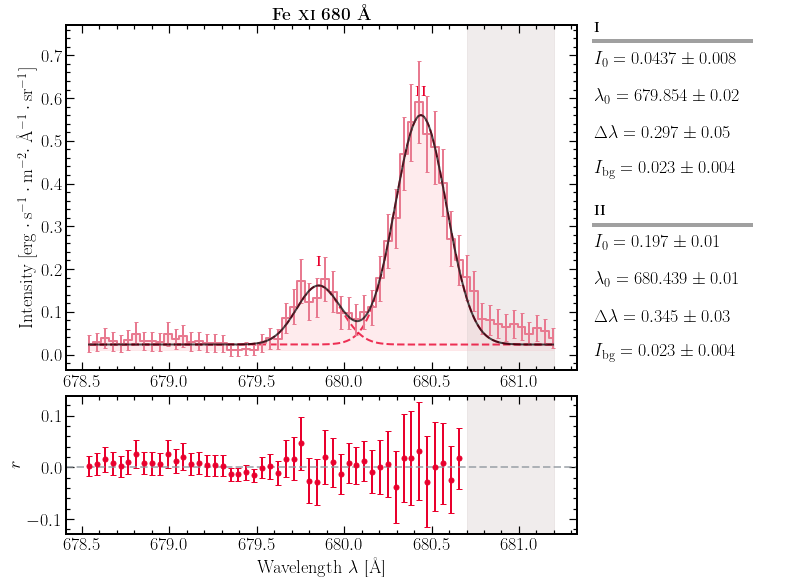

In [5]:
FeXI_680_fit_model = SpectrumFitSingle(data=int_FeXI_680,wvl=wvl_FeXI_680,err=err_FeXI_680,
                                      same_width=False,line_number=2,line_wvl_init=[679.7,680.4],
                                      int_max_init=[0.1,0.6],fwhm_init=[0.2,0.2],mask=[[680.7,681.2]])

FeXI_680_fit_model.run_lse()
FeXI_680_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 680 \mbox{\AA}}",
                       xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeXI_680_fit_model.line_wvl_fit,1,FeXI_680_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [232.51]


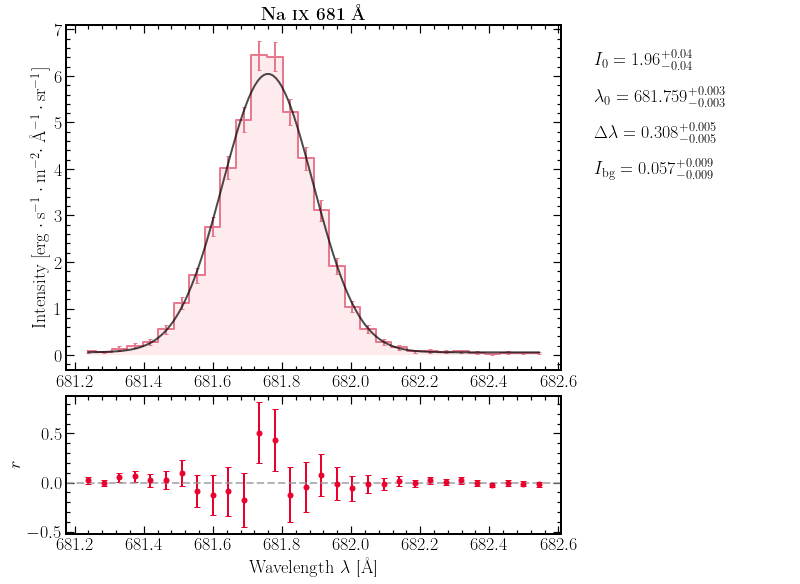

In [6]:
NaIX_681_slice = (210,240)
wvl_NaIX_681 = wvl_338[NaIX_681_slice[0]:NaIX_681_slice[1]]
radiometry_NaIX_681 = radiometry(1,681.75,1,1,bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_NaIX_681 = np.average(sumer_338_window[-30:,NaIX_681_slice[0]:NaIX_681_slice[1]],axis=0)*radiometry_NaIX_681
err_NaIX_681 = np.sqrt(np.sum(300*sumer_338_window[-30:,NaIX_681_slice[0]:NaIX_681_slice[1]],
                        axis=0))/30/300*radiometry_NaIX_681

NaIX_681_fit_model = SpectrumFitSingle(data=int_NaIX_681,wvl=wvl_NaIX_681,err=err_NaIX_681,
                                      same_width=True,line_number=1,line_wvl_init=[681.8],
                                      int_max_init=[5],fwhm_init=[0.2])
#NaIX_681_fit_model.plot(plot_fit=False,plot_params=False)
NaIX_681_fit_model.run_HahnMC(n_chain=10000,absolute_sigma=True)
NaIX_681_fit_model.plot(plot_title=r"\textbf{Na \textsc{ix} 681 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NaIX_681_fit_model.line_wvl_fit,1,NaIX_681_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


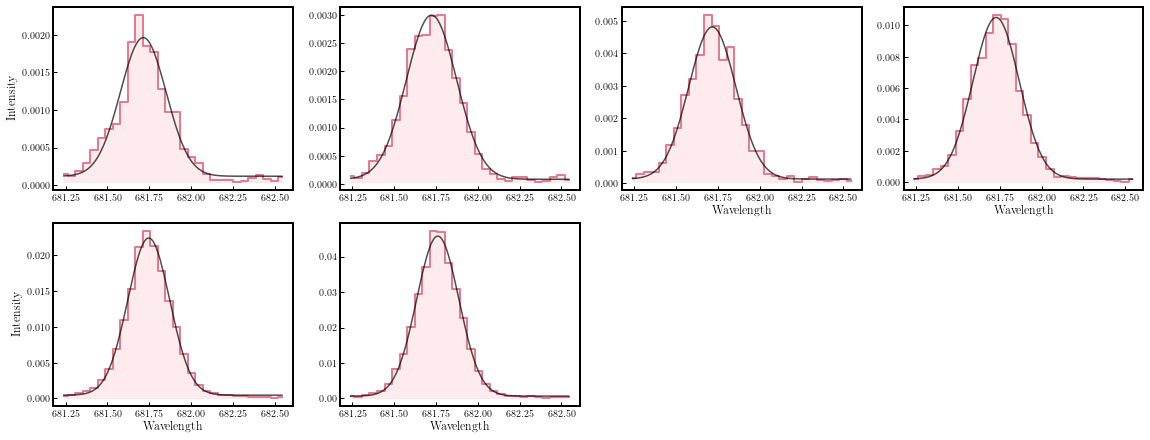

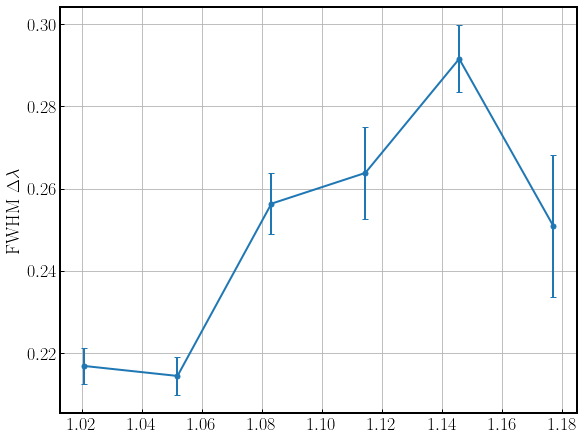

In [7]:
int_NaIX_681_row = np.average(sumer_338_window[-180:,NaIX_681_slice[0]:NaIX_681_slice[1]].reshape(-1,30,NaIX_681_slice[1]-NaIX_681_slice[0]),axis=1)

NaIX_681_fit_row_model = SpectrumFitRow(data=int_NaIX_681_row,wvl=wvl_NaIX_681,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[681.8],
                                      int_max_init=[0.04],fwhm_init=[0.2])
NaIX_681_fit_row_model.run_lse()
NaIX_681_fit_row_model.plot_fit()
NaIX_681_fit_row_model.fwhm_fit = con_width_funct_4(1,NaIX_681_fit_row_model.line_wvl_fit,1, NaIX_681_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = NaIX_681_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:180].reshape(-1,30),axis=1))/960)
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [187.]


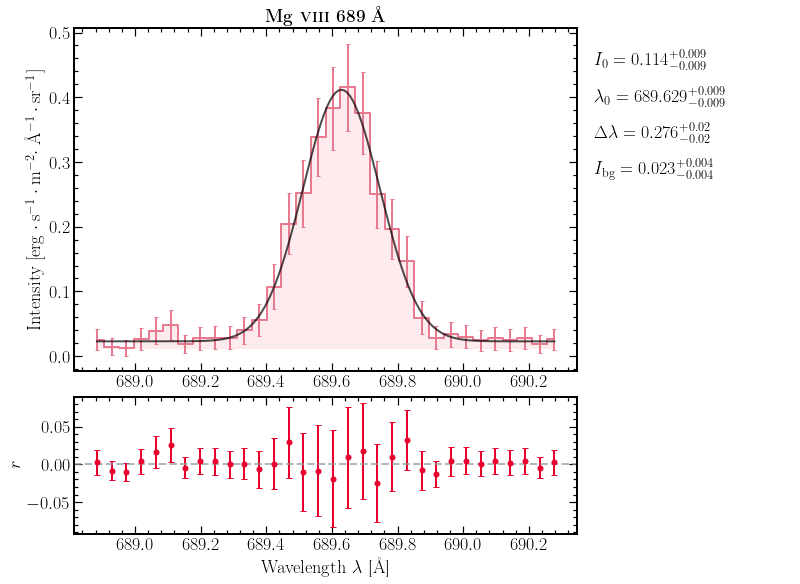

In [8]:
MgVIII_689_slice = (380,412)
wvl_MgVIII_689 = wvl_338[MgVIII_689_slice[0]:MgVIII_689_slice[1]]
radiometry_MgVIII_689 = radiometry(1,689.6,1,1,bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_MgVIII_689 = np.average(sumer_338_window[-30:,MgVIII_689_slice[0]:MgVIII_689_slice[1]],axis=0)*radiometry_MgVIII_689
err_MgVIII_689 = np.sqrt(np.sum(300*sumer_338_window[-30:,MgVIII_689_slice[0]:MgVIII_689_slice[1]],
                        axis=0))/30/300*radiometry_MgVIII_689

MgVIII_689_fit_model = SpectrumFitSingle(data=int_MgVIII_689,wvl=wvl_MgVIII_689,err=err_MgVIII_689,
                                      same_width=True,line_number=1,line_wvl_init=[689.7],
                                      int_max_init=[1],fwhm_init=[0.2])
#MgVIII_689_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_689_fit_model.run_HahnMC(n_chain=10000)
MgVIII_689_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 689 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_689_fit_model.line_wvl_fit_hmc,1,MgVIII_689_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [259.33]


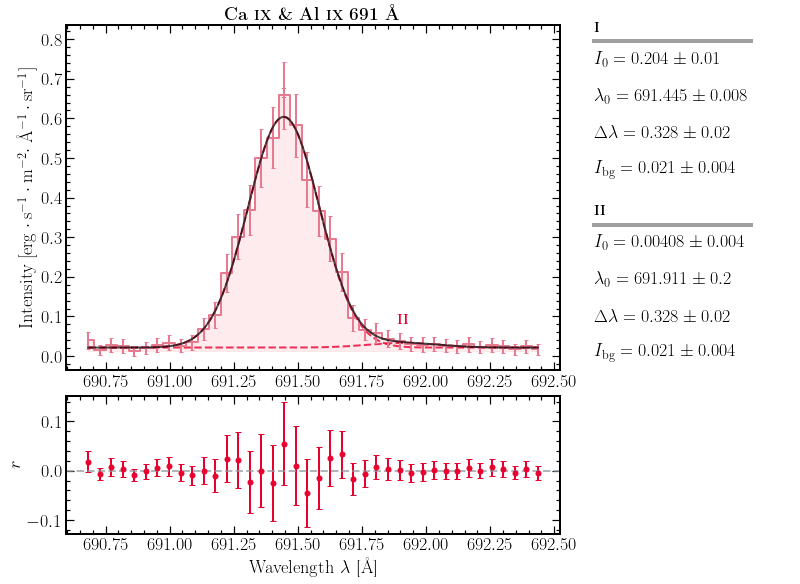

In [9]:
CaIX_AlIX_691_slice = (420,460)
wvl_CaIX_AlIX_691 = wvl_338[CaIX_AlIX_691_slice[0]:CaIX_AlIX_691_slice[1]]
radiometry_CaIX_AlIX_691 = radiometry(1,691.5,1,1,bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_CaIX_AlIX_691 = np.average(sumer_338_window[-30:,CaIX_AlIX_691_slice[0]:CaIX_AlIX_691_slice[1]],axis=0)*radiometry_CaIX_AlIX_691
err_CaIX_AlIX_691 = np.sqrt(np.sum(300*sumer_338_window[-30:,CaIX_AlIX_691_slice[0]:CaIX_AlIX_691_slice[1]],
                        axis=0))/30/300*radiometry_CaIX_AlIX_691

CaIX_AlIX_691_fit_model = SpectrumFitSingle(data=int_CaIX_AlIX_691,wvl=wvl_CaIX_AlIX_691,err=err_CaIX_AlIX_691,
                                      same_width=True,line_number=2,line_wvl_init=[691.4,691.6],
                                      int_max_init=[1,0.2],fwhm_init=[0.2])
#CaIX_AlIX_691_fit_model.plot(plot_fit=False,plot_params=False)
CaIX_AlIX_691_fit_model.run_lse()
CaIX_AlIX_691_fit_model.plot(plot_title=r"\textbf{Ca \textsc{ix} \& Al \textsc{ix} 691 \mbox{\AA}}",
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
#CaIX_AlIX_691_fit_model.run_HahnMC(n_chain=10000)
#CaIX_AlIX_691_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 689 \mbox{\AA}}",plot_hmc=True,
#                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                        ylabel=r"Intensity $\mathrm{[DN\cdot s^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,CaIX_AlIX_691_fit_model.line_wvl_fit[0],1,CaIX_AlIX_691_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [264.22 272.55 141.8  245.63]


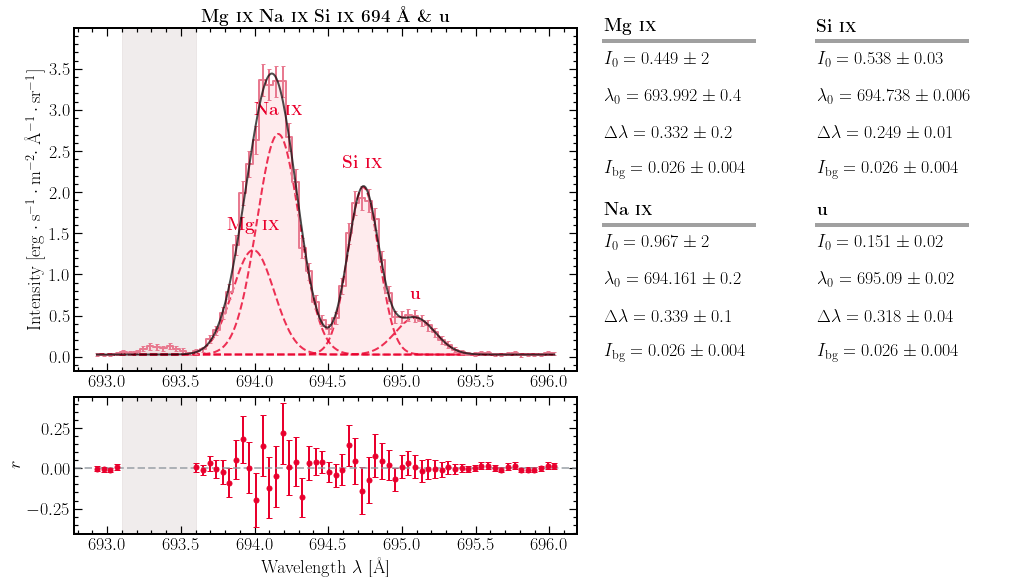

In [10]:
MgIX_NaIX_SiIX_694_slice = (470,540)
wvl_MgIX_NaIX_SiIX_694 = wvl_338[MgIX_NaIX_SiIX_694_slice[0]:MgIX_NaIX_SiIX_694_slice[1]]
radiometry_MgIX_NaIX_SiIX_694 = radiometry(1,wvl_MgIX_NaIX_SiIX_694,1,np.ones_like(wvl_MgIX_NaIX_SiIX_694),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_MgIX_NaIX_SiIX_694 = np.average(sumer_338_window[-30:,MgIX_NaIX_SiIX_694_slice[0]:MgIX_NaIX_SiIX_694_slice[1]],axis=0)*radiometry_MgIX_NaIX_SiIX_694
err_MgIX_NaIX_SiIX_694 = np.sqrt(np.sum(300*sumer_338_window[-30:,MgIX_NaIX_SiIX_694_slice[0]:MgIX_NaIX_SiIX_694_slice[1]],
                        axis=0))/30/300*radiometry_MgIX_NaIX_SiIX_694

MgIX_NaIX_SiIX_694_fit_model = SpectrumFitSingle(data=int_MgIX_NaIX_SiIX_694,wvl=wvl_MgIX_NaIX_SiIX_694,err=err_MgIX_NaIX_SiIX_694,
                                      same_width=False,line_number=4,line_wvl_init=[693.9,694.1,694.7,695.1],
                                      int_max_init=[0.5,3,0.7,0.2],fwhm_init=[0.3,0.3,0.2,0.3],mask=[[693.1,693.6]])
# MgIX_NaIX_SiIX_694_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_NaIX_SiIX_694_fit_model.run_lse(absolute_sigma=True)
MgIX_NaIX_SiIX_694_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} Na \textsc{ix} Si \textsc{ix} 694 \mbox{\AA} \& u}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                line_caption=[r"\textbf{Mg \textsc{ix}}",r"\textbf{Na \textsc{ix}}",
                                r"\textbf{Si \textsc{ix}}",r"\textbf{u}"])
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_NaIX_SiIX_694_fit_model.line_wvl_fit,1,MgIX_NaIX_SiIX_694_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [194.74]


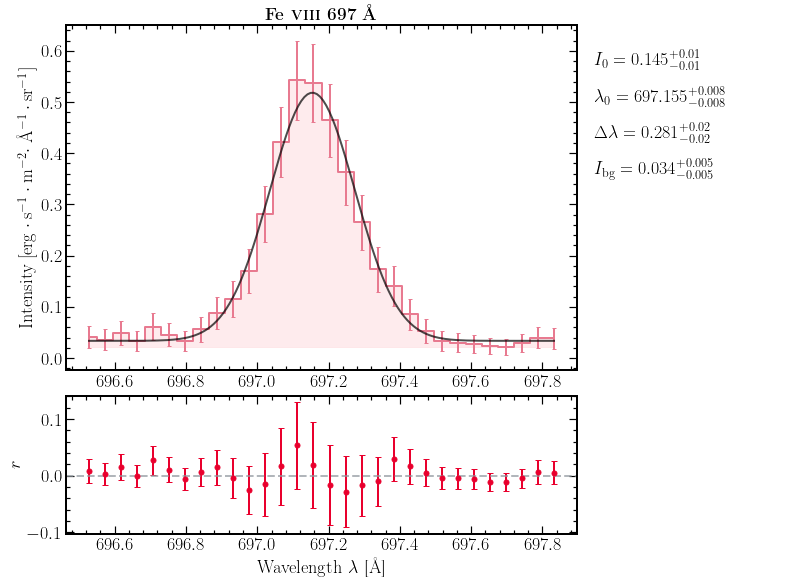

In [11]:
FeVIII_697_slice = (550,580)
wvl_FeVIII_697 = wvl_338[FeVIII_697_slice[0]:FeVIII_697_slice[1]]
radiometry_FeVIII_697 = radiometry(1,wvl_FeVIII_697,1,np.ones_like(wvl_FeVIII_697),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_FeVIII_697 = np.average(sumer_338_window[-30:,FeVIII_697_slice[0]:FeVIII_697_slice[1]],axis=0)*radiometry_FeVIII_697
err_FeVIII_697 = np.sqrt(np.sum(300*sumer_338_window[-30:,FeVIII_697_slice[0]:FeVIII_697_slice[1]],
                        axis=0))/30/300*radiometry_FeVIII_697

FeVIII_697_fit_model = SpectrumFitSingle(data=int_FeVIII_697,wvl=wvl_FeVIII_697,err=err_FeVIII_697,
                                      same_width=True,line_number=1,line_wvl_init=[697.1],
                                      int_max_init=[0.5],fwhm_init=[0.2])
#FeVIII_697_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_697_fit_model.run_HahnMC(n_chain=10000)
FeVIII_697_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 697 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,FeVIII_697_fit_model.line_wvl_fit_hmc,1,FeVIII_697_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [231.37]


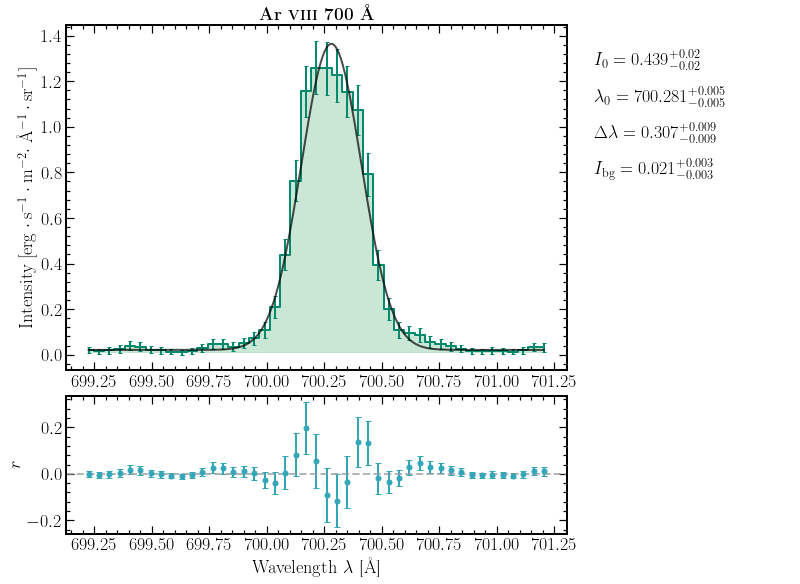

In [12]:
ArVIII_700_slice = (610,655)
wvl_ArVIII_700 = wvl_338[ArVIII_700_slice[0]:ArVIII_700_slice[1]]
radiometry_ArVIII_700 = radiometry(1,wvl_ArVIII_700,1,np.ones_like(wvl_ArVIII_700),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3

int_ArVIII_700 = np.average(sumer_338_window[-30:,ArVIII_700_slice[0]:ArVIII_700_slice[1]],axis=0)*radiometry_ArVIII_700
err_ArVIII_700 = np.sqrt(np.sum(300*sumer_338_window[-30:,ArVIII_700_slice[0]:ArVIII_700_slice[1]],
                        axis=0))/30/300*radiometry_ArVIII_700

ArVIII_700_fit_model = SpectrumFitSingle(data=int_ArVIII_700,wvl=wvl_ArVIII_700,err=err_ArVIII_700,
                                      same_width=True,line_number=1,line_wvl_init=[700.2],
                                      int_max_init=[1.2],fwhm_init=[0.2])
#ArVIII_700_fit_model.plot(plot_fit=False,plot_params=False)
ArVIII_700_fit_model.run_HahnMC(n_chain=10000,ignore_err=False)
ArVIII_700_fit_model.plot(plot_title=r"\textbf{Ar \textsc{viii} 700 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                         color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,ArVIII_700_fit_model.line_wvl_fit_hmc,1,ArVIII_700_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:469: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


FWHM after removing instrumental broadening:  [159.24 168.99 154.02 159.24]


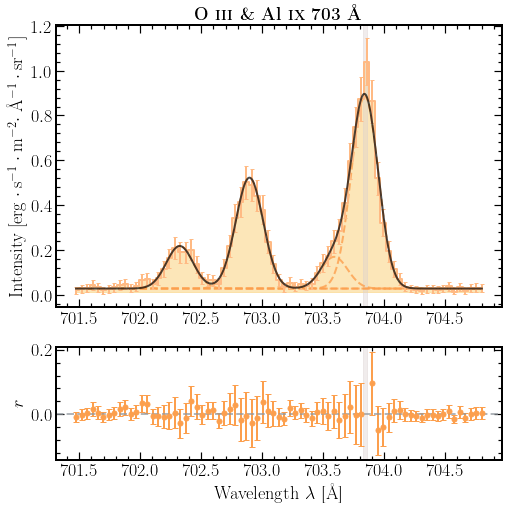

In [13]:
OIII_AlIX_slice = (660,735)
wvl_OIII_AlIX = wvl_338[OIII_AlIX_slice[0]:OIII_AlIX_slice[1]]
radiometry_OIII_AlIX = radiometry(1,wvl_OIII_AlIX,1,np.ones_like(wvl_OIII_AlIX),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_OIII_AlIX = np.average(sumer_338_window[-30:,OIII_AlIX_slice[0]:OIII_AlIX_slice[1]],axis=0)*radiometry_OIII_AlIX
err_OIII_AlIX = np.sqrt(np.sum(300*sumer_338_window[-30:,OIII_AlIX_slice[0]:OIII_AlIX_slice[1]],
                        axis=0))/30/300*radiometry_OIII_AlIX
def OIII_AlIX_fit_func(wvl,int1,int2,int3,int4,wvl1,wvl2,wvl3,fwhm1,fwhm2,fwhm3,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,int2,fwhm2) + \
            gaussian(wvl,wvl3,int3,fwhm3) + gaussian(wvl,wvl1+703.8540-702.3370,int4,fwhm1) + int_cont
OIII_AlIX_fit_model = SpectrumFitSingle(data=int_OIII_AlIX,wvl=wvl_OIII_AlIX,err=err_OIII_AlIX,
                                      custom_func=OIII_AlIX_fit_func,custom_init=[0.2,0.4,0.1,0.8,702.2,702.9,703.5,0.2,0.2,0.2,0],
                                      mask=[[703.83,703.86]])
#OIII_AlIX_fit_model.plot(plot_fit=False,plot_params=False)
OIII_AlIX_fit_model.run_lse(absolute_sigma=True)
ax = OIII_AlIX_fit_model.plot(plot_title=r"\textbf{O \textsc{iii} \& Al \textsc{ix} 703 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                color_style="Yellow")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[4],
        OIII_AlIX_fit_model.custom_fit[0],OIII_AlIX_fit_model.custom_fit[7])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[5],
        OIII_AlIX_fit_model.custom_fit[1],OIII_AlIX_fit_model.custom_fit[8])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[6],
        OIII_AlIX_fit_model.custom_fit[2],OIII_AlIX_fit_model.custom_fit[9])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
ax.plot(OIII_AlIX_fit_model.wvl_plot,gaussian(OIII_AlIX_fit_model.wvl_plot,OIII_AlIX_fit_model.custom_fit[4]+703.8540-702.3370,
        OIII_AlIX_fit_model.custom_fit[3],OIII_AlIX_fit_model.custom_fit[7])+OIII_AlIX_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#FC9F4D")
        
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,np.concatenate((OIII_AlIX_fit_model.custom_fit[4:7],OIII_AlIX_fit_model.custom_fit[4]+703.8540-702.3370),axis=None),
1,np.concatenate((OIII_AlIX_fit_model.custom_fit[7:10],OIII_AlIX_fit_model.custom_fit[7]),axis=None)*1000,DET_B=True))

In [14]:
print(OIII_AlIX_fit_model.custom_fit[6])
print(OIII_AlIX_fit_model.custom_fit[9])
print(OIII_AlIX_fit_model.custom_err[9])

703.5918957387969
0.2556473839085625
0.0861662553038134


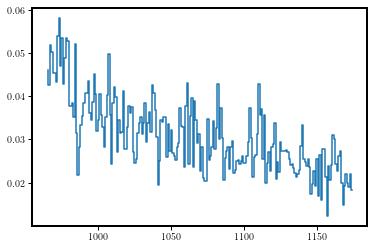

In [15]:
OIII_slice = (660,699)
wvl_OIII = wvl_338[OIII_slice[0]:OIII_slice[1]]
int_OIII = np.sum(sumer_338_window[-210:,OIII_slice[0]:OIII_slice[1]],axis=1) - \
     39*np.average(sumer_338_window[-210:,OIII_slice[0]:OIII_slice[0]+10],axis=1)
plt.step(np.flip(sumer_ycoord[:210]),int_OIII,where="mid")

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [228.5]


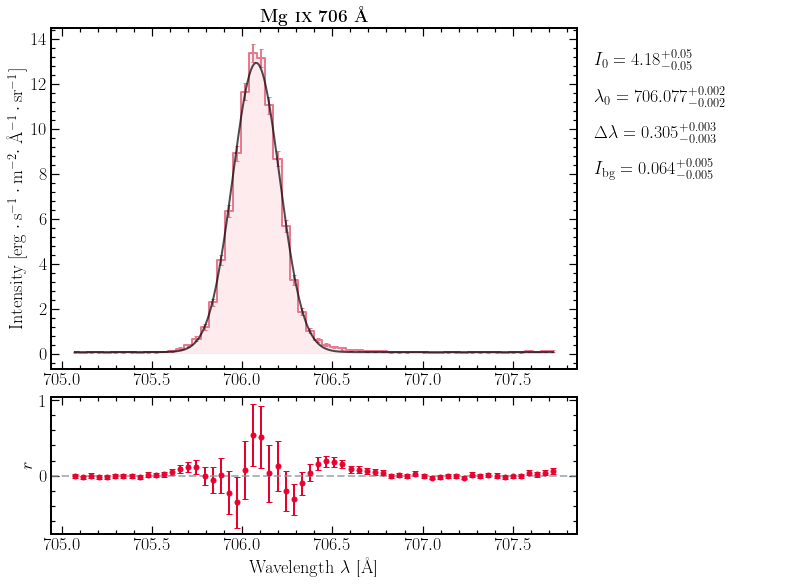

In [16]:
MgIX_706_slice = (740,800)
wvl_MgIX_706 = wvl_338[MgIX_706_slice[0]:MgIX_706_slice[1]]
radiometry_MgIX_706 = radiometry(1,wvl_MgIX_706,1,np.ones_like(wvl_MgIX_706),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgIX_706 = np.average(sumer_338_window[-30:,MgIX_706_slice[0]:MgIX_706_slice[1]],axis=0)*radiometry_MgIX_706
err_MgIX_706 = np.sqrt(np.sum(300*sumer_338_window[-30:,MgIX_706_slice[0]:MgIX_706_slice[1]],
                        axis=0))/30/300*radiometry_MgIX_706

MgIX_706_fit_model = SpectrumFitSingle(data=int_MgIX_706,wvl=wvl_MgIX_706,err=err_MgIX_706,
                                      same_width=True,line_number=1,line_wvl_init=[706.1],
                                      int_max_init=[12],fwhm_init=[0.2])
#MgIX_706_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_706_fit_model.run_HahnMC(n_chain=10000)
MgIX_706_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} 706 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_706_fit_model.line_wvl_fit_hmc,1,MgIX_706_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [203.45 564.36]


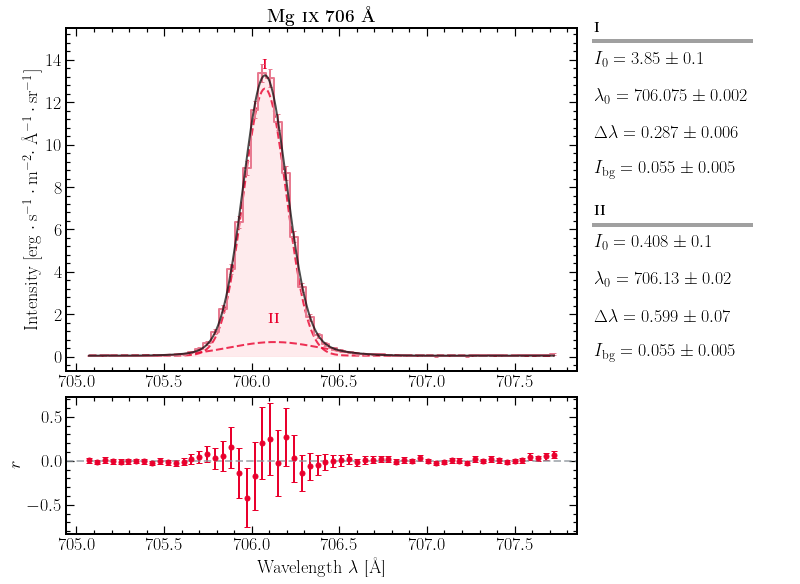

In [17]:
MgIX_706_slice = (740,800)
wvl_MgIX_706 = wvl_338[MgIX_706_slice[0]:MgIX_706_slice[1]]
radiometry_MgIX_706 = radiometry(1,wvl_MgIX_706,1,np.ones_like(wvl_MgIX_706),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgIX_706 = np.average(sumer_338_window[-30:,MgIX_706_slice[0]:MgIX_706_slice[1]],axis=0)*radiometry_MgIX_706
err_MgIX_706 = np.sqrt(np.sum(300*sumer_338_window[-30:,MgIX_706_slice[0]:MgIX_706_slice[1]],
                        axis=0))/30/300*radiometry_MgIX_706

MgIX_706_fit_model = SpectrumFitSingle(data=int_MgIX_706,wvl=wvl_MgIX_706,err=err_MgIX_706,
                                      same_width=False,line_number=2,line_wvl_init=[706.1,706.1],
                                      int_max_init=[12,1],fwhm_init=[0.2,0.4])
#MgIX_706_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_706_fit_model.run_lse()
MgIX_706_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} 706 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_706_fit_model.line_wvl_fit,1,MgIX_706_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


<AxesSubplot:ylabel='FWHM $\\Delta \\lambda$'>

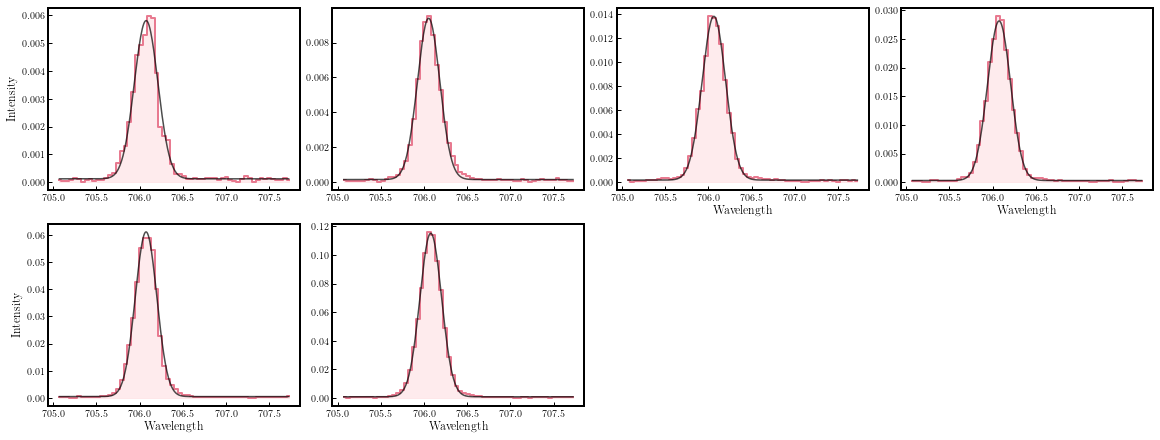

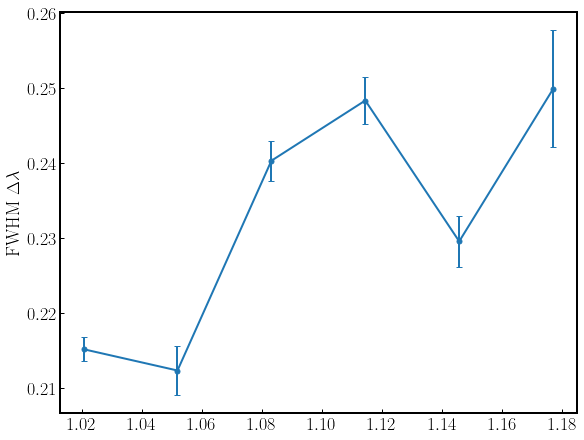

In [18]:
int_MgIX_706_row = np.average(sumer_338_window[-180:,MgIX_706_slice[0]:MgIX_706_slice[1]].reshape(-1,30,MgIX_706_slice[1]-MgIX_706_slice[0]),axis=1)

MgIX_706_fit_row_model = SpectrumFitRow(data=int_MgIX_706_row,wvl=wvl_MgIX_706,err=None,
                                      same_width=True,line_number=1,line_wvl_init=[706.1],
                                      int_max_init=[0.12],fwhm_init=[0.2])
MgIX_706_fit_row_model.run_lse()
MgIX_706_fit_row_model.plot_fit()
MgIX_706_fit_row_model.fwhm_fit = con_width_funct_4(1,MgIX_706_fit_row_model.line_wvl_fit,1, MgIX_706_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
MgIX_706_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:180].reshape(-1,30),axis=1))/960)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [197.54]


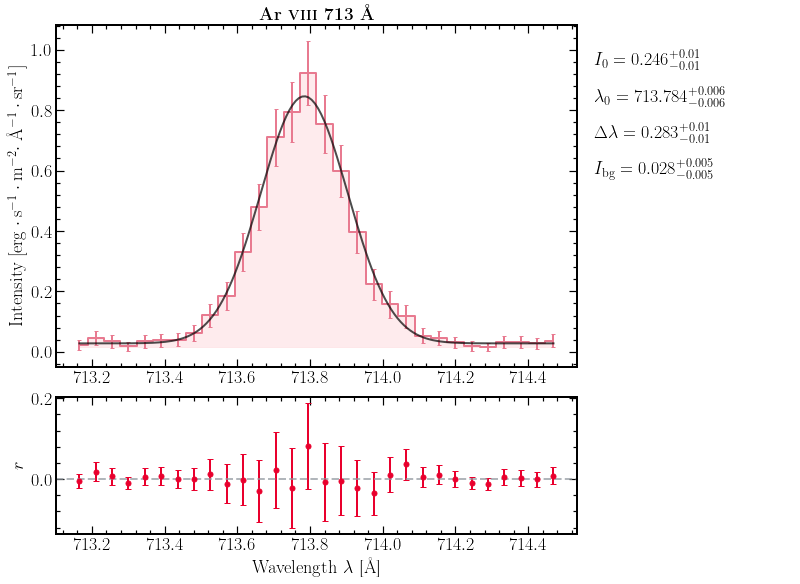

In [19]:
ArVIII_713_slice = (920,950)
wvl_ArVIII_713 = wvl_338[ArVIII_713_slice[0]:ArVIII_713_slice[1]]
radiometry_ArVIII_713 = radiometry(1,wvl_ArVIII_713,1,np.ones_like(wvl_ArVIII_713),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_ArVIII_713 = np.average(sumer_338_window[-30:,ArVIII_713_slice[0]:ArVIII_713_slice[1]],axis=0)*radiometry_ArVIII_713
err_ArVIII_713 = np.sqrt(np.sum(300*sumer_338_window[-30:,ArVIII_713_slice[0]:ArVIII_713_slice[1]],
                        axis=0))/30/300*radiometry_ArVIII_713
ArVIII_713_fit_model = SpectrumFitSingle(data=int_ArVIII_713,wvl=wvl_ArVIII_713,err=err_ArVIII_713,
                                      same_width=True,line_number=1,line_wvl_init=[713.8],
                                      int_max_init=[0.7],fwhm_init=[0.2])
#ArVIII_713_fit_model.plot(plot_fit=False,plot_params=False)
ArVIII_713_fit_model.run_HahnMC(n_chain=10000)
ArVIII_713_fit_model.plot(plot_title=r"\textbf{Ar \textsc{viii} 713 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,ArVIII_713_fit_model.line_wvl_fit,1,ArVIII_713_fit_model.fwhm_fit*1000,DET_B=True))